<a href="https://colab.research.google.com/github/joaoSouza2121/redes-neurais/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color ="green">Redes Neurais Artificiais</font>

Trabalhando com o Keras

In [1]:
# Imports
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

# Classificação de Dígitos escritos à mão

Carregando os dados

11493376/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '0')

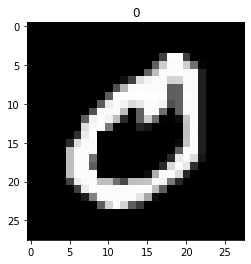

In [2]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

Análise e Pré-processamento dos dados

In [4]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
#X_teste[0]

In [5]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

Normalização

In [6]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [7]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)


In [8]:
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Criação da Topologia da Rede Neural

In [9]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout -> é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting (super ajuste)
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, -> softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

Sumário do modelo

In [10]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

Treinamento e Validação do modelo

In [11]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy) -> adam = melhor otimizador da rede
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7274 - accuracy: 0.7650 - val_loss: 0.1574 - val_accuracy: 0.9525
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2374 - accuracy: 0.9312 - val_loss: 0.1356 - val_accuracy: 0.9585
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1959 - accuracy: 0.9421 - val_loss: 0.1153 - val_accuracy: 0.9648
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1661 - accuracy: 0.9517 - val_loss: 0.1187 - val_accuracy: 0.9658
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1469 - accuracy: 0.9579 - val_loss: 0.0974 - val_accuracy: 0.9704
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1440 - accuracy: 0.9588 - val_loss: 0.1035 - val_accuracy: 0.9692
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1285 - accuracy: 0.9625 - val_loss: 0.1032 - val_accuracy:

Visualizando Graficamente a performance da rede

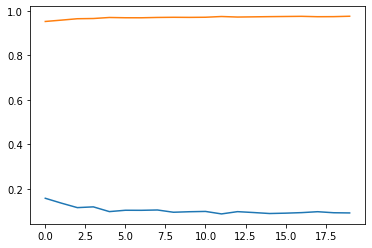

In [12]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

Previsões

In [13]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)


In [15]:
#print(previsoes)

Matriz de Confusão

In [16]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 963,    0,    2,    0,    0,    2,    3,    4,    3,    3],
       [   0, 1119,    4,    2,    0,    3,    2,    1,    4,    0],
       [   0,    1, 1006,    7,    1,    0,    2,    8,    7,    0],
       [   0,    0,    3,  991,    0,    7,    0,    6,    2,    1],
       [   0,    0,    4,    0,  960,    0,    4,    2,    1,   11],
       [   3,    0,    0,    9,    1,  866,    1,    2,    6,    4],
       [   4,    3,    0,    1,    5,    5,  936,    0,    4,    0],
       [   1,    3,    5,    2,    0,    1,    0, 1010,    1,    5],
       [   4,    0,    4,    4,    5,    6,    3,    4,  939,    5],
       [   3,    4,    0,    2,   19,    2,    0,    6,    3,  970]])

In [17]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]